In [3]:
import xarray as xr
import matplotlib.pyplot as plt
from products.plot_settings import METEOFRANCE_VAR_NAME,NASA_L3_VAR_NAME,NASA_PSEUDO_L3_VAR_NAME
analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_3/analyses/uncertainty'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True)
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True)
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True)
analyses_dict = {METEOFRANCE_VAR_NAME: mf_metrics_ds, NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds, NASA_L3_VAR_NAME: nasa_l3_metrics_ds}

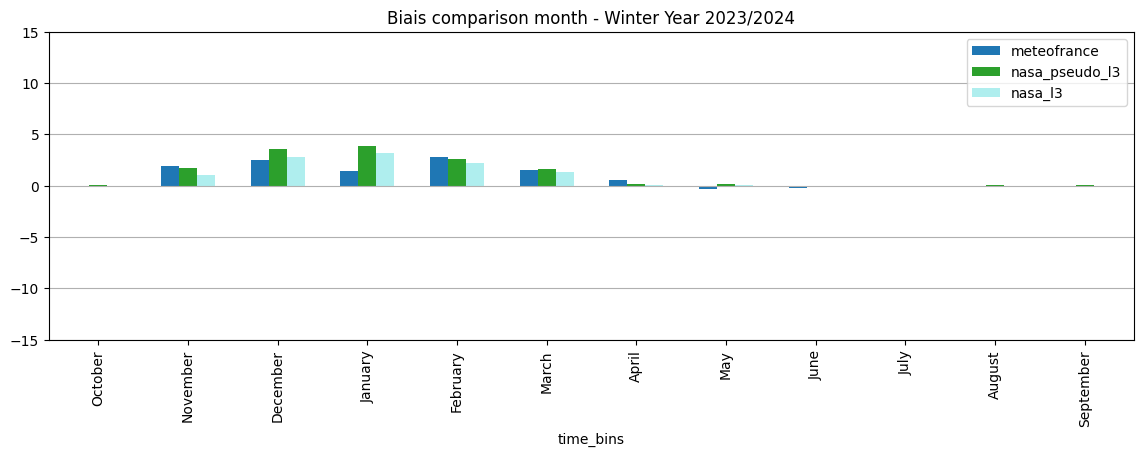

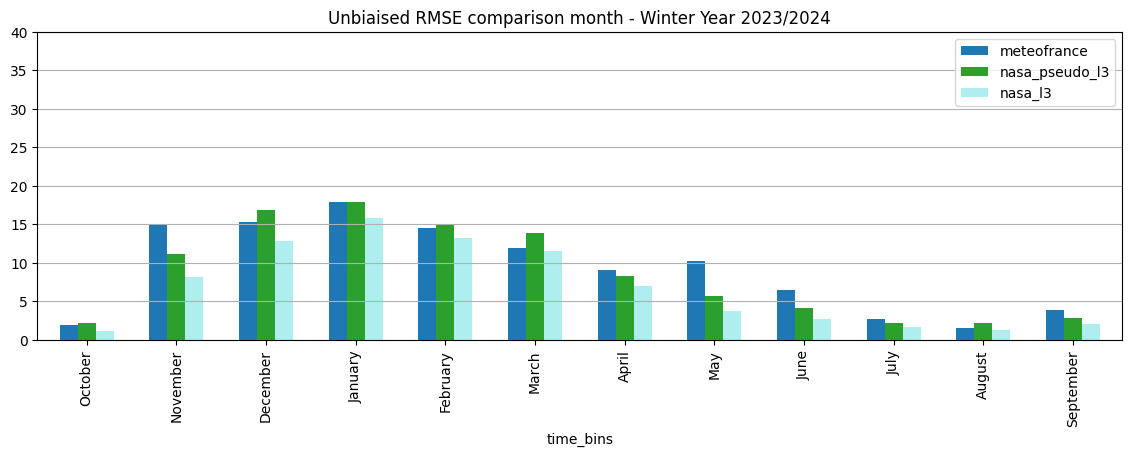

In [93]:
from evaluations.statistics_base import EvaluationVsHighResBase
from winter_year import WinterYear
from evaluations.uncertainty import  biais_barplots, postprocess_uncertainty_analysis, unbiaised_rmse_barplots

wy = WinterYear(2023,2024)
biais_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var={'time':EvaluationVsHighResBase.month_bins(wy)}), analysis_var_plot_name='month', winter_year=wy)
unbiaised_rmse_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var={'time':EvaluationVsHighResBase.month_bins(wy)}), analysis_var_plot_name='month', winter_year=wy)

In [ ]:
from evaluations.uncertainty import histograms_to_biais_rmse
reduced = mf_metrics_ds.sel(time='2024-01').groupby(['slope_bins', 'aspect_bins', 'altitude_bins']).map(histograms_to_biais_rmse).reindex_like(mf_metrics_ds)

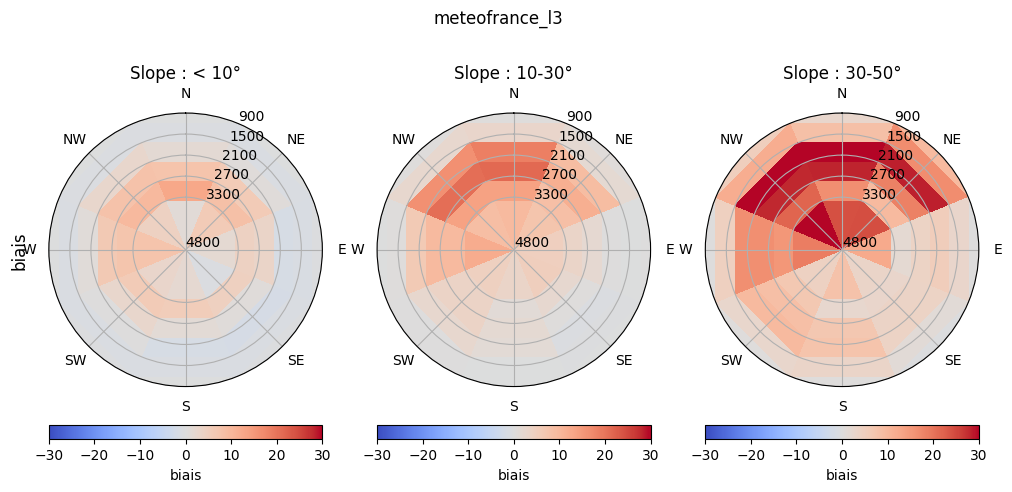

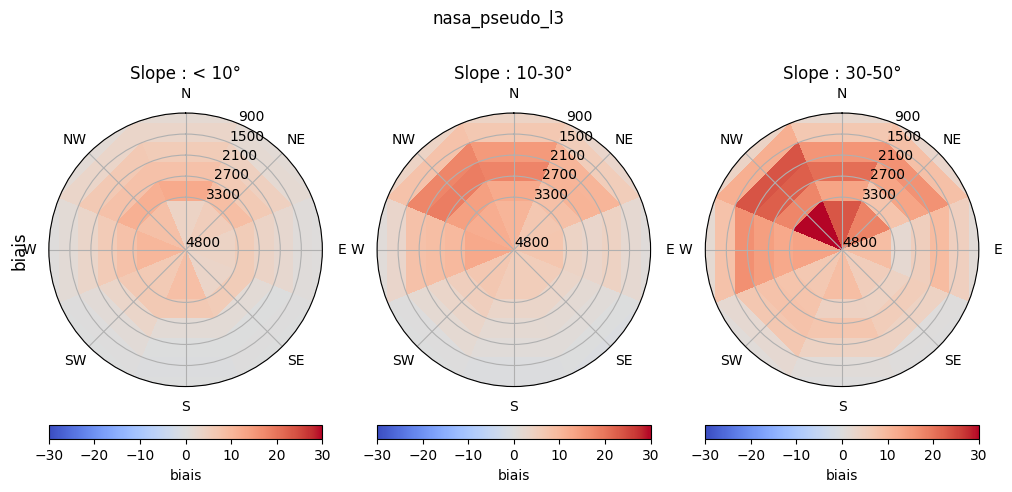

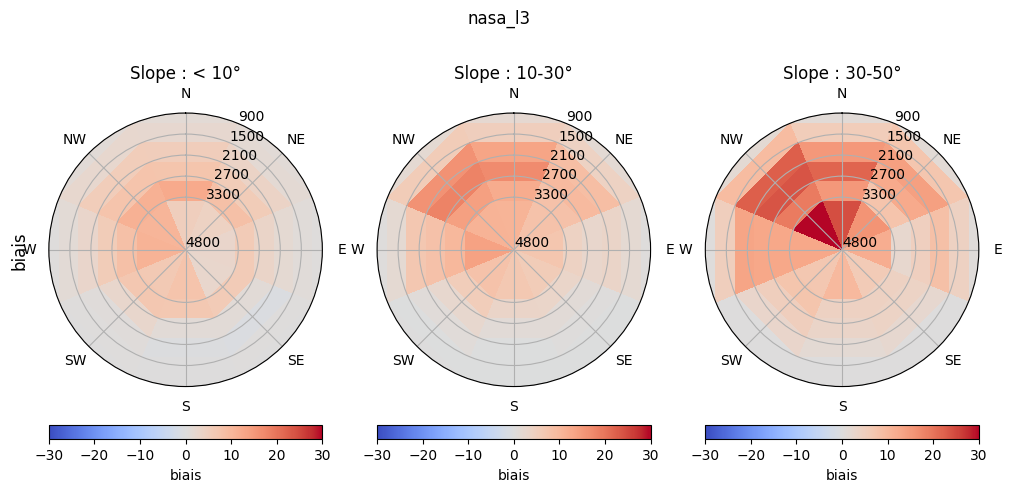

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from evaluations.statistics_base import EvaluationVsHighResBase
from evaluations.uncertainty import histograms_to_biais_rmse
import xarray as xr

analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_3/analyses/uncertainty'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True).sel(time=slice('2023-12','2024-03'))
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True).sel(time=slice('2023-12','2024-03'))
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True).sel(time=slice('2023-12','2024-03'))
analyses_dict = {METEOFRANCE_VAR_NAME: mf_metrics_ds, NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds, NASA_L3_VAR_NAME: nasa_l3_metrics_ds}

variable = 'biais'
slope_titles = ['< 10', '10-30', '30-50']
for product_name,dataset in analyses_dict.items():
    fig, ax = plt.subplots(1,3,figsize=(12,5),subplot_kw=dict(projection='polar'))
    dataset_reduced = dataset.groupby(['slope_bins', 'aspect_bins', 'altitude_bins']).map(histograms_to_biais_rmse).reindex_like(dataset)
    for i,slope in enumerate(dataset_reduced.coords['slope_bins'].values[:3]):
        ax[i].set_theta_direction(-1)
        ax[i].set_theta_zero_location('N')
        ax[i].set_xticks(np.deg2rad(EvaluationVsHighResBase.aspect_bins().bins[1:] - 22.5))
        ax[i].set_xticklabels(dataset.coords['aspect_bins'].values)
        ax[i].set_rticks(dataset.coords['altitude_bins'].values)
        ax[i].set_rlim(dataset.coords['altitude_bins'].values[-1],dataset.coords['altitude_bins'].values[0])
        ax[i].set_title('Slope : '+slope_titles[i]+'°')
        ax[0].set_ylabel(variable, labelpad = 15, fontsize = 12)

        im = ax[i].pcolor(np.deg2rad(EvaluationVsHighResBase.aspect_bins().bins),
                        np.array([0,*dataset.coords['altitude_bins'].values]),
                        dataset_reduced.data_vars[variable].sel(slope_bins = slope).transpose().values, 
                        cmap = 'coolwarm',
                        vmin=-30,
                        vmax=30)

        fig.colorbar(im,ax = ax[i], orientation = 'horizontal', label = variable, fraction = 0.05, pad = 0.1)
        fig.suptitle(product_name)

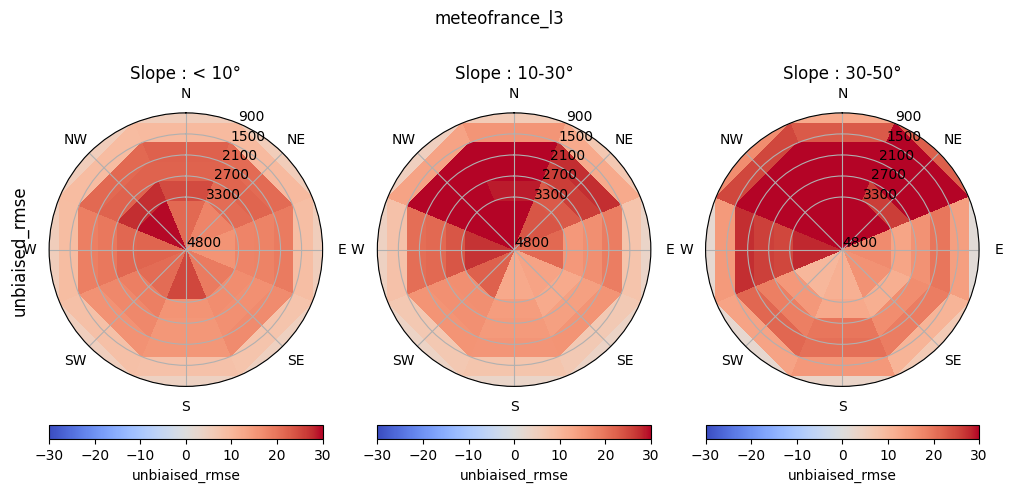

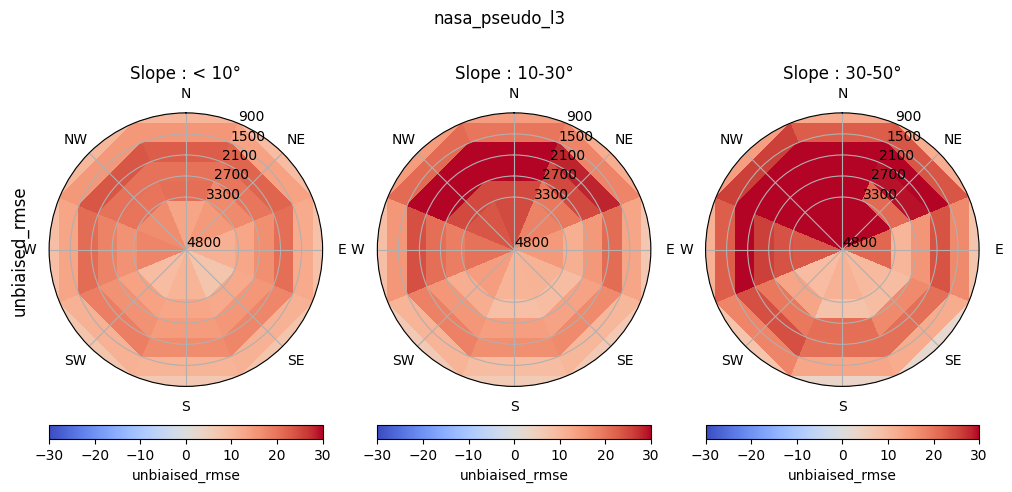

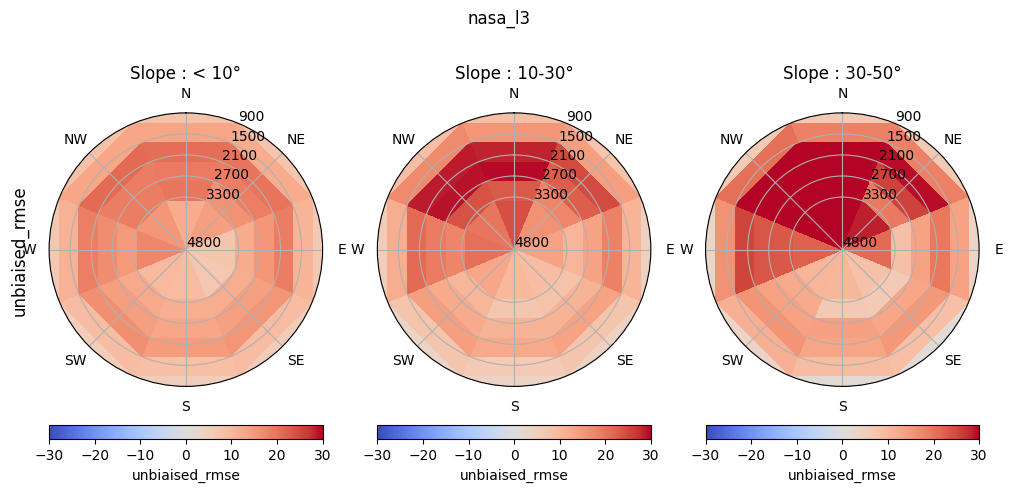

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from evaluations.statistics_base import EvaluationVsHighResBase
from evaluations.uncertainty import histograms_to_biais_rmse

analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_3/analyses/uncertainty'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True).sel(time=slice('2023-12','2024-03'))
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True).sel(time=slice('2023-12','2024-03'))
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True).sel(time=slice('2023-12','2024-03'))
analyses_dict = {METEOFRANCE_VAR_NAME: mf_metrics_ds, NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds, NASA_L3_VAR_NAME: nasa_l3_metrics_ds}

variable = 'unbiaised_rmse'
slope_titles = ['< 10', '10-30', '30-50']
for product_name,dataset in analyses_dict.items():
    fig, ax = plt.subplots(1,3,figsize=(12,5),subplot_kw=dict(projection='polar'))
    dataset_reduced = dataset.groupby(['slope_bins', 'aspect_bins', 'altitude_bins']).map(histograms_to_biais_rmse).reindex_like(dataset)
    for i,slope in enumerate(dataset_reduced.coords['slope_bins'].values[:3]):
        ax[i].set_theta_direction(-1)
        ax[i].set_theta_zero_location('N')
        ax[i].set_xticks(np.deg2rad(EvaluationVsHighResBase.aspect_bins().bins[1:] - 22.5))
        ax[i].set_xticklabels(dataset.coords['aspect_bins'].values)
        ax[i].set_rticks(dataset.coords['altitude_bins'].values)
        ax[i].set_rlim(dataset.coords['altitude_bins'].values[-1],dataset.coords['altitude_bins'].values[0])
        ax[i].set_title('Slope : '+slope_titles[i]+'°')
        ax[0].set_ylabel(variable, labelpad = 15, fontsize = 12)

        im = ax[i].pcolor(np.deg2rad(EvaluationVsHighResBase.aspect_bins().bins),
                        np.array([0,*dataset.coords['altitude_bins'].values]),
                        dataset_reduced.data_vars[variable].sel(slope_bins = slope).transpose().values, 
                        cmap = 'coolwarm',
                        vmin=-30,
                        vmax=30)

        fig.colorbar(im,ax = ax[i], orientation = 'horizontal', label = variable, fraction = 0.05, pad = 0.1)
        fig.suptitle(product_name)

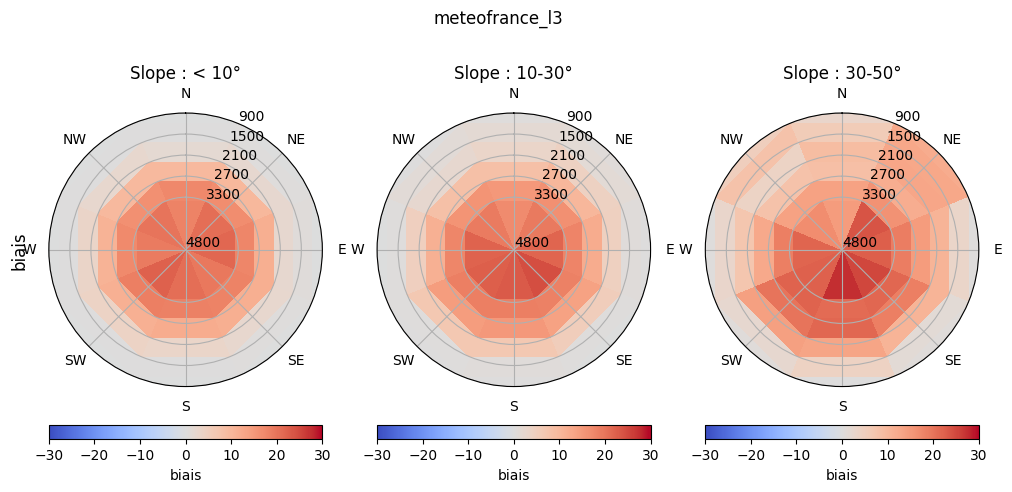

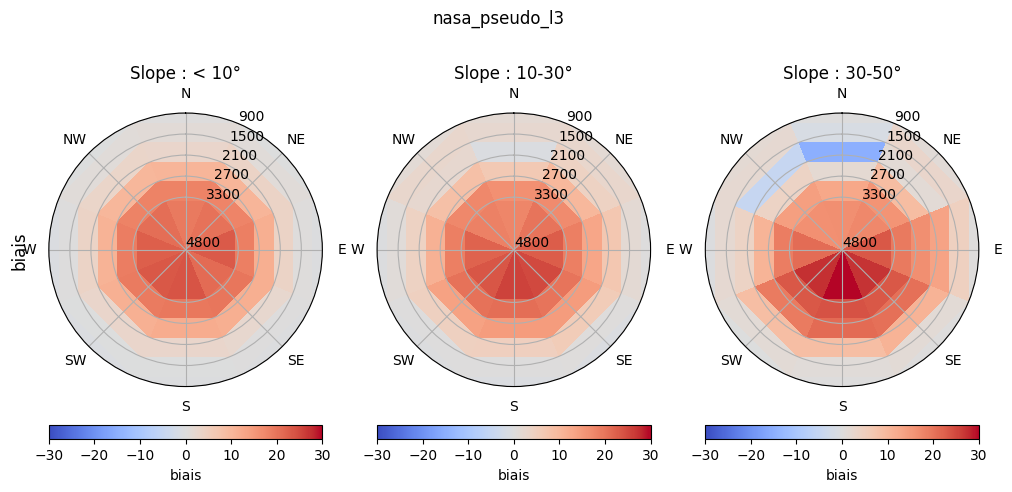

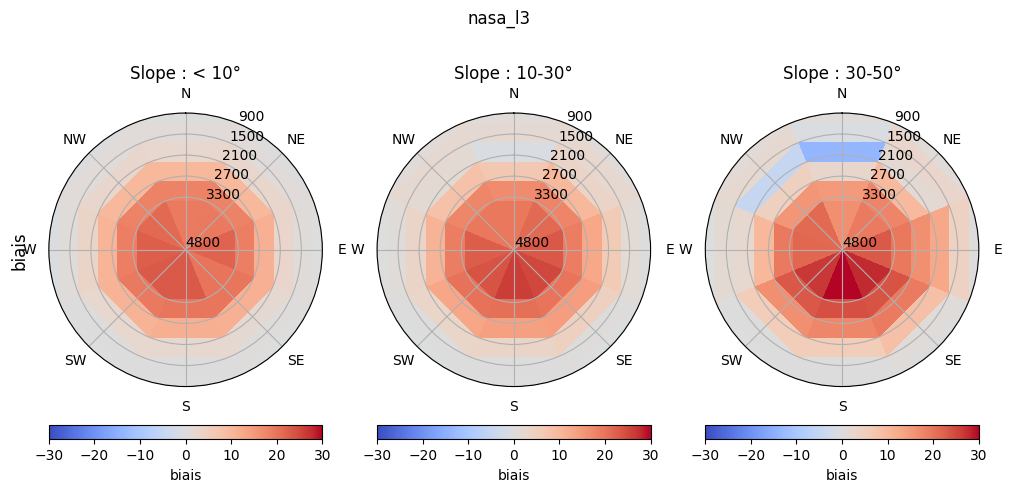

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from evaluations.statistics_base import EvaluationVsHighResBase
from evaluations.uncertainty import histograms_to_biais_rmse

analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_4/analyses/uncertainty'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True).sel(time=slice('2023-12','2024-03'))
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True).sel(time=slice('2023-12','2024-03'))
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True).sel(time=slice('2023-12','2024-03'))
analyses_dict = {METEOFRANCE_VAR_NAME: mf_metrics_ds, NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds, NASA_L3_VAR_NAME: nasa_l3_metrics_ds}

variable = 'biais'
slope_titles = ['< 10', '10-30', '30-50']
for product_name,dataset in analyses_dict.items():
    fig, ax = plt.subplots(1,3,figsize=(12,5),subplot_kw=dict(projection='polar'))
    dataset_reduced = dataset.groupby(['slope_bins', 'aspect_bins', 'altitude_bins']).map(histograms_to_biais_rmse).reindex_like(dataset)
    for i,slope in enumerate(dataset_reduced.coords['slope_bins'].values[:3]):
        ax[i].set_theta_direction(-1)
        ax[i].set_theta_zero_location('N')
        ax[i].set_xticks(np.deg2rad(EvaluationVsHighResBase.aspect_bins().bins[1:] - 22.5))
        ax[i].set_xticklabels(dataset.coords['aspect_bins'].values)
        ax[i].set_rticks(dataset.coords['altitude_bins'].values)
        ax[i].set_rlim(dataset.coords['altitude_bins'].values[-1],dataset.coords['altitude_bins'].values[0])
        ax[i].set_title('Slope : '+slope_titles[i]+'°')
        ax[0].set_ylabel(variable, labelpad = 15, fontsize = 12)

        im = ax[i].pcolor(np.deg2rad(EvaluationVsHighResBase.aspect_bins().bins),
                        np.array([0,*dataset.coords['altitude_bins'].values]),
                        dataset_reduced.data_vars[variable].sel(slope_bins = slope).transpose().values, 
                        cmap = 'coolwarm',
                        vmin=-30,
                        vmax=30)

        fig.colorbar(im,ax = ax[i], orientation = 'horizontal', label = variable, fraction = 0.05, pad = 0.1)
        fig.suptitle(product_name)

In [13]:
30000*10000*30 / (2800*2200*300)

4.87012987012987

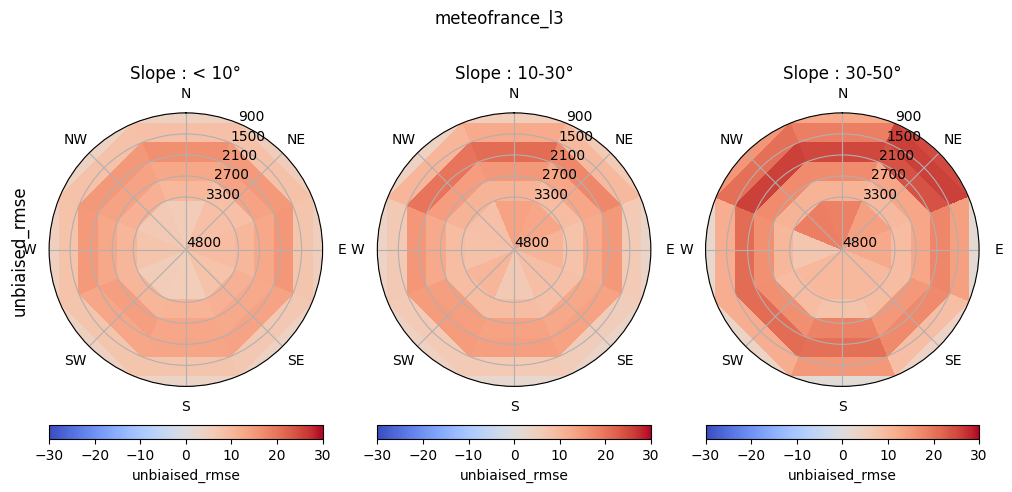

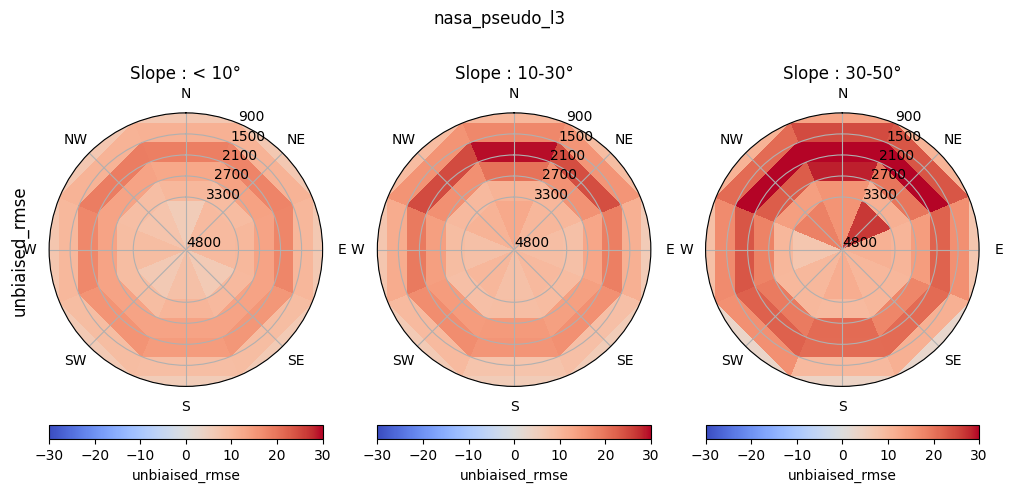

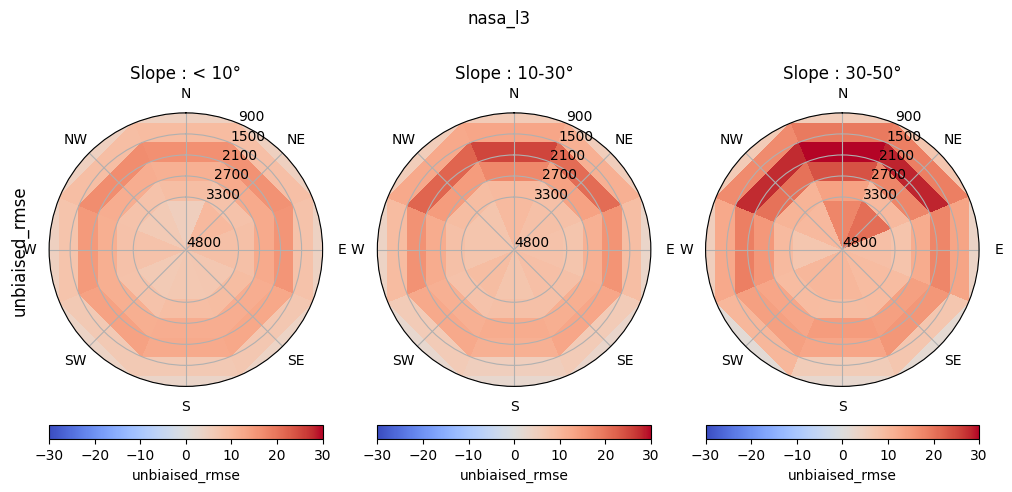

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from evaluations.statistics_base import EvaluationVsHighResBase
from evaluations.uncertainty import histograms_to_biais_rmse

analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_4/analyses/uncertainty'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True).sel(time=slice('2023-12', '2024-03'))
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True).sel(time=slice('2023-12', '2024-03'))
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True).sel(time=slice('2023-12', '2024-03'))
analyses_dict = {METEOFRANCE_VAR_NAME: mf_metrics_ds, NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds, NASA_L3_VAR_NAME: nasa_l3_metrics_ds}

variable = 'unbiaised_rmse'
slope_titles = ['< 10', '10-30', '30-50']
for product_name,dataset in analyses_dict.items():
    fig, ax = plt.subplots(1,3,figsize=(12,5),subplot_kw=dict(projection='polar'))
    dataset_reduced = dataset.groupby(['slope_bins', 'aspect_bins', 'altitude_bins']).map(histograms_to_biais_rmse).reindex_like(dataset)
    for i,slope in enumerate(dataset_reduced.coords['slope_bins'].values[:3]):
        ax[i].set_theta_direction(-1)
        ax[i].set_theta_zero_location('N')
        ax[i].set_xticks(np.deg2rad(EvaluationVsHighResBase.aspect_bins().bins[1:] - 22.5))
        ax[i].set_xticklabels(dataset.coords['aspect_bins'].values)
        ax[i].set_rticks(dataset.coords['altitude_bins'].values)
        ax[i].set_rlim(dataset.coords['altitude_bins'].values[-1],dataset.coords['altitude_bins'].values[0])
        ax[i].set_title('Slope : '+slope_titles[i]+'°')
        ax[0].set_ylabel(variable, labelpad = 15, fontsize = 12)

        im = ax[i].pcolor(np.deg2rad(EvaluationVsHighResBase.aspect_bins().bins),
                        np.array([0,*dataset.coords['altitude_bins'].values]),
                        dataset_reduced.data_vars[variable].sel(slope_bins = slope).transpose().values, 
                        cmap = 'coolwarm',
                        vmin=-30,
                        vmax=30)

        fig.colorbar(im,ax = ax[i], orientation = 'horizontal', label = variable, fraction = 0.05, pad = 0.1)
        fig.suptitle(product_name)

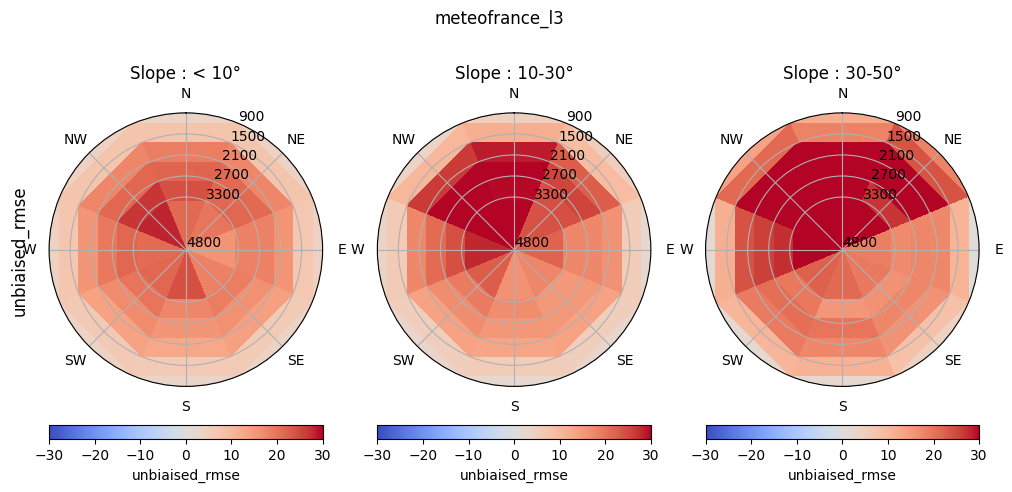

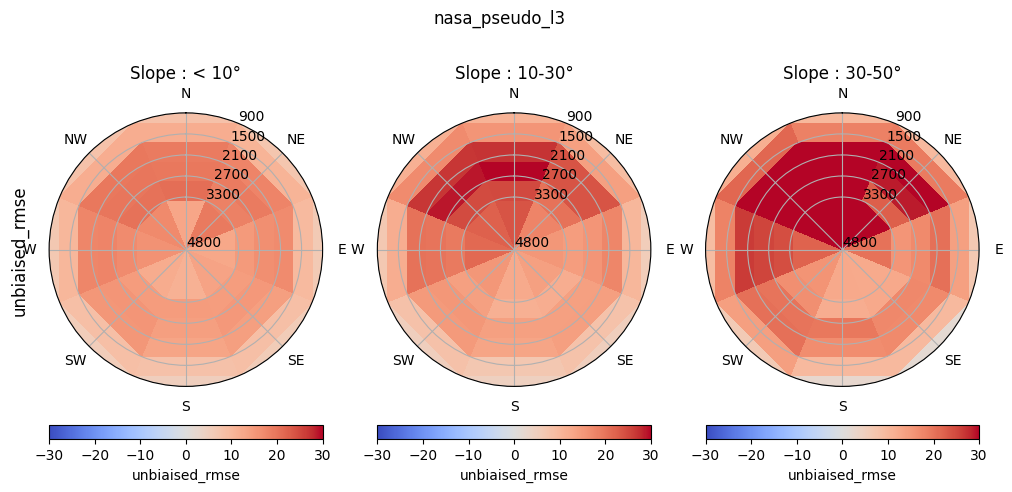

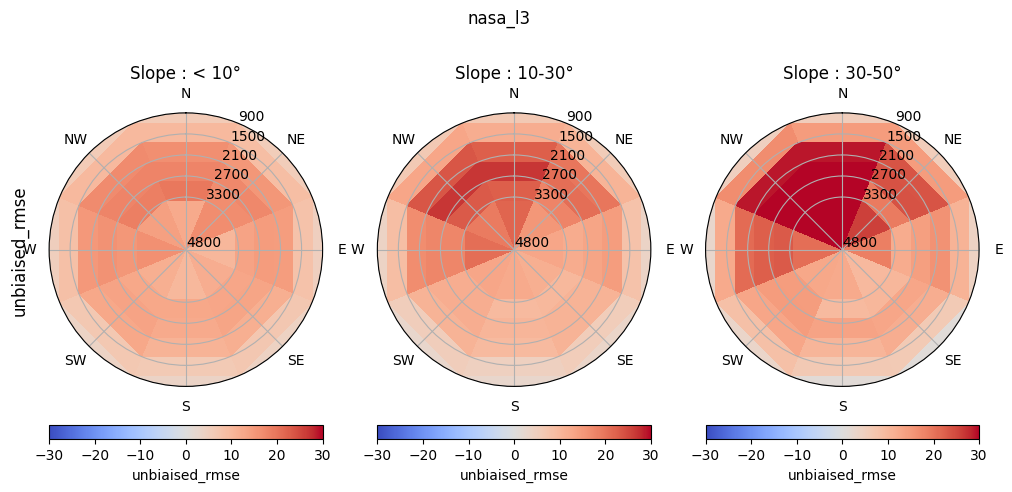

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from evaluations.statistics_base import EvaluationVsHighResBase
from evaluations.uncertainty import histograms_to_biais_rmse

analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_3/analyses/uncertainty'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True)
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True)
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True)
analyses_dict = {METEOFRANCE_VAR_NAME: mf_metrics_ds, NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds, NASA_L3_VAR_NAME: nasa_l3_metrics_ds}

variable = 'unbiaised_rmse'
slope_titles = ['< 10', '10-30', '30-50']
for product_name,dataset in analyses_dict.items():
    fig, ax = plt.subplots(1,3,figsize=(12,5),subplot_kw=dict(projection='polar'))
    dataset_reduced = dataset.groupby(['slope_bins', 'aspect_bins', 'altitude_bins']).map(histograms_to_biais_rmse).reindex_like(dataset)
    for i,slope in enumerate(dataset_reduced.coords['slope_bins'].values[:3]):
        ax[i].set_theta_direction(-1)
        ax[i].set_theta_zero_location('N')
        ax[i].set_xticks(np.deg2rad(EvaluationVsHighResBase.aspect_bins().bins[1:] - 22.5))
        ax[i].set_xticklabels(dataset.coords['aspect_bins'].values)
        ax[i].set_rticks(dataset.coords['altitude_bins'].values)
        ax[i].set_rlim(dataset.coords['altitude_bins'].values[-1],dataset.coords['altitude_bins'].values[0])
        ax[i].set_title('Slope : '+slope_titles[i]+'°')
        ax[0].set_ylabel(variable, labelpad = 15, fontsize = 12)

        im = ax[i].pcolor(np.deg2rad(EvaluationVsHighResBase.aspect_bins().bins),
                        np.array([0,*dataset.coords['altitude_bins'].values]),
                        dataset_reduced.data_vars[variable].sel(slope_bins = slope).transpose().values, 
                        cmap = 'coolwarm',
                        vmin=-30,
                        vmax=30)

        fig.colorbar(im,ax = ax[i], orientation = 'horizontal', label = variable, fraction = 0.05, pad = 0.1)
        fig.suptitle(product_name)
        

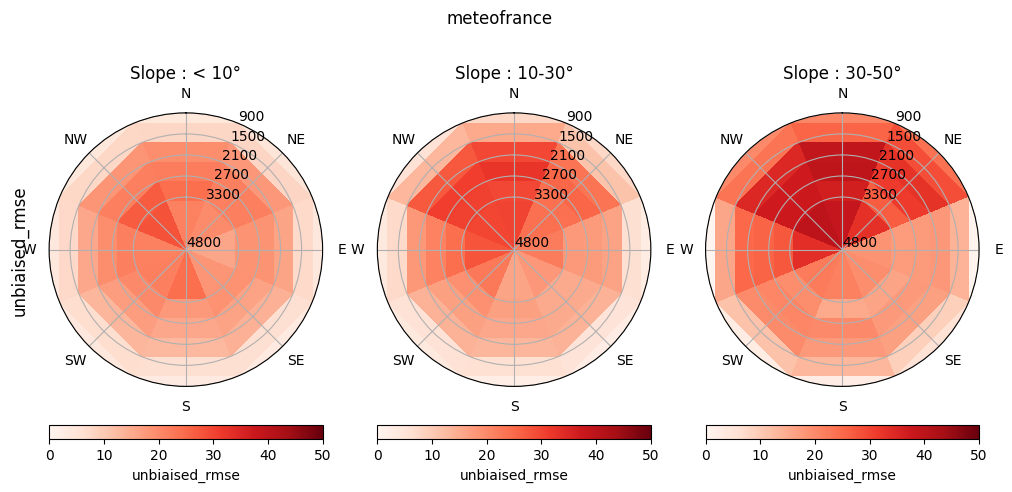

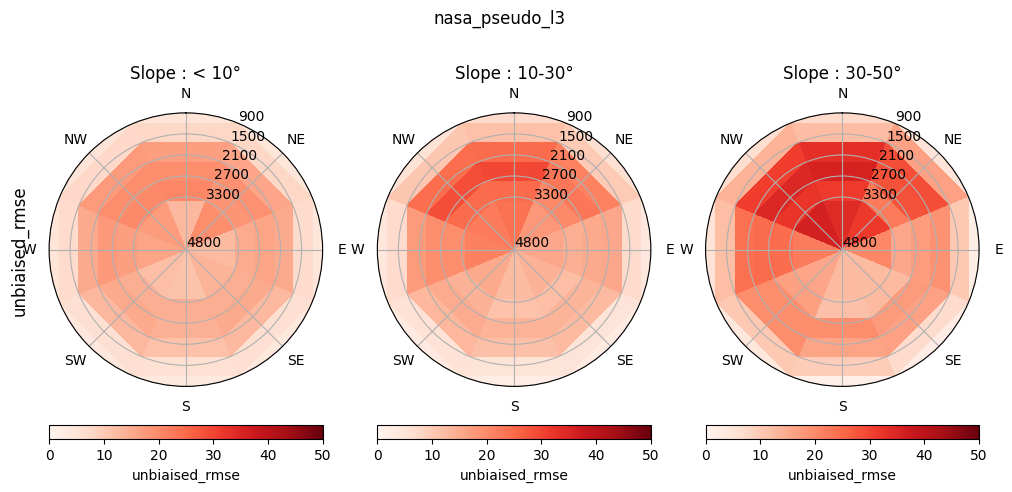

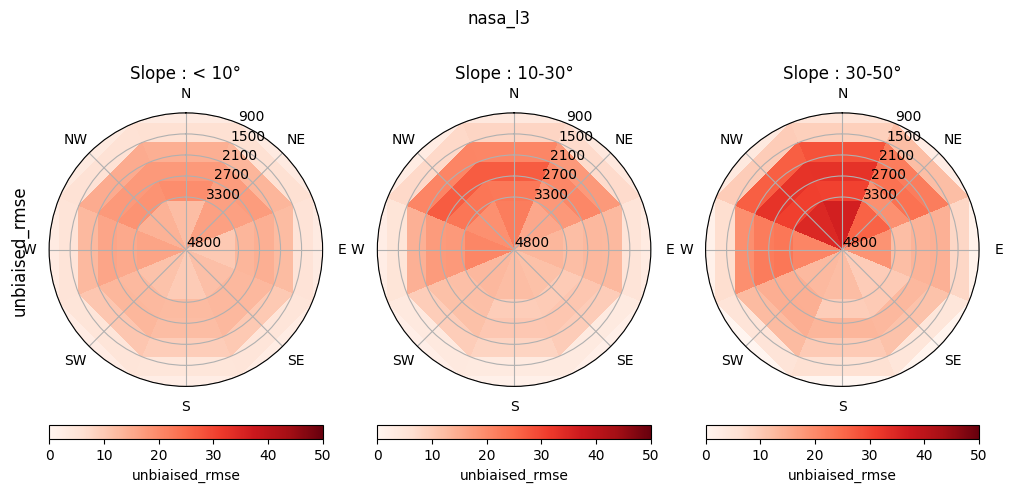

In [3]:
variable = 'unbiaised_rmse'
for product_name,dataset in analyses_dict.items():
    fig, ax = plt.subplots(1,3,figsize=(12,5),subplot_kw=dict(projection='polar'))
    dataset_reduced = dataset.groupby(['slope_bins', 'aspect_bins', 'altitude_bins']).map(histograms_to_biais_rmse).reindex_like(dataset)
    for i,slope in enumerate(dataset_reduced.coords['slope_bins'].values[:3]):
        ax[i].set_theta_direction(-1)
        ax[i].set_theta_zero_location('N')
        ax[i].set_xticks(np.deg2rad(EvaluationVsHighResBase.aspect_bins().bins[1:] - 22.5))
        ax[i].set_xticklabels(dataset.coords['aspect_bins'].values)
        ax[i].set_rticks(dataset.coords['altitude_bins'].values)
        ax[i].set_rlim(dataset.coords['altitude_bins'].values[-1],dataset.coords['altitude_bins'].values[0])
        ax[i].set_title('Slope : '+slope_titles[i]+'°')
        ax[0].set_ylabel(variable, labelpad = 15, fontsize = 12)

        im = ax[i].pcolor(np.deg2rad(EvaluationVsHighResBase.aspect_bins().bins),
                        np.array([0,*dataset.coords['altitude_bins'].values]),
                        dataset_reduced.data_vars[variable].sel(slope_bins = slope).transpose().values, 
                        cmap = 'Reds',
                        vmin=0,
                        vmax=50)

        fig.colorbar(im,ax = ax[i], orientation = 'horizontal', label = variable, fraction = 0.05, pad = 0.1)
        fig.suptitle(product_name)

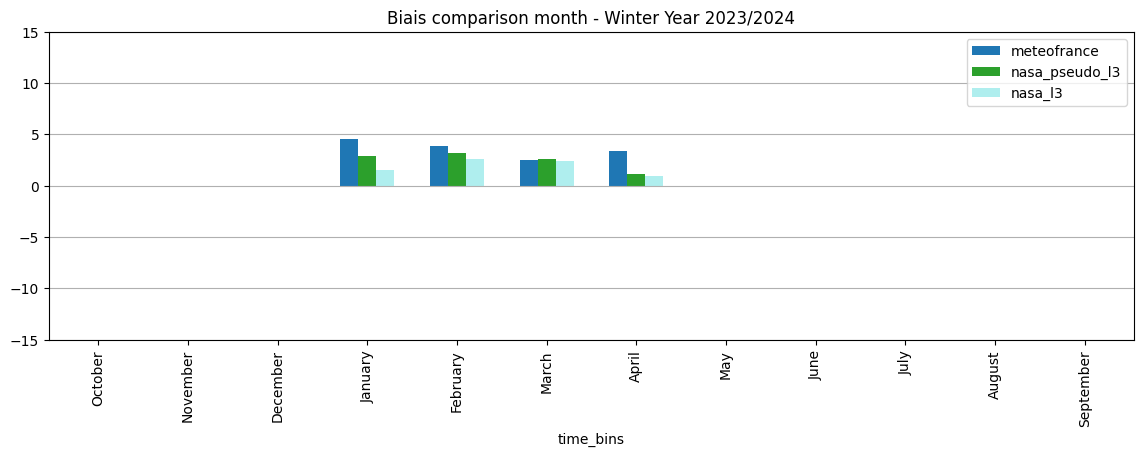

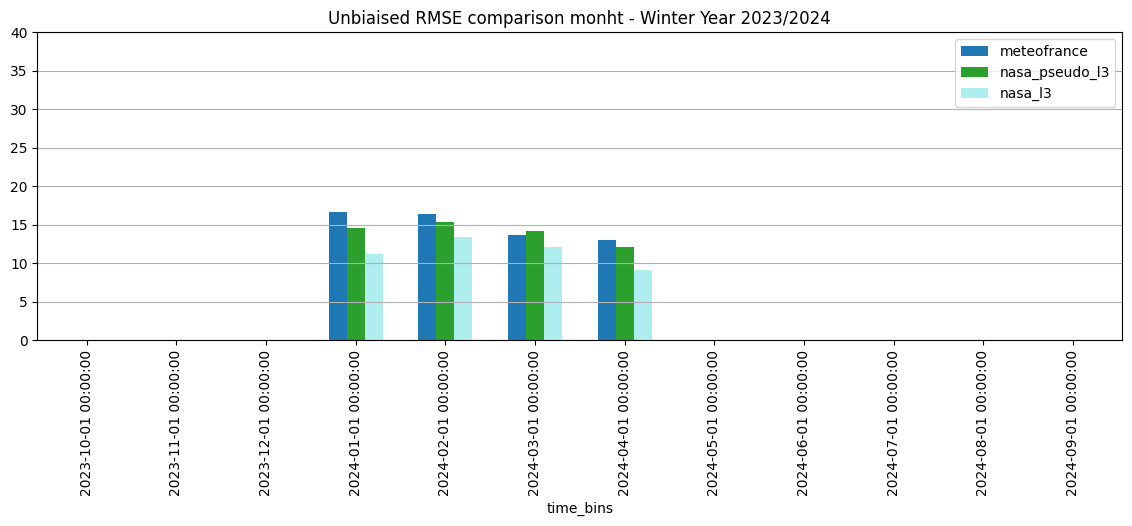

In [4]:
from evaluations.statistics_base import EvaluationVsHighResBase
from winter_year import WinterYear
from evaluations.uncertainty import  biais_barplots, postprocess_uncertainty_analysis, unbiaised_rmse_barplots

wy = WinterYear(2023,2024)
biais_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var={'time':EvaluationVsHighResBase.month_bins(wy)}), analysis_var_plot_name='month', winter_year=wy)
unbiaised_rmse_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var={'time':EvaluationVsHighResBase.month_bins(wy)}), analysis_var_plot_name='monht', winter_year=wy)

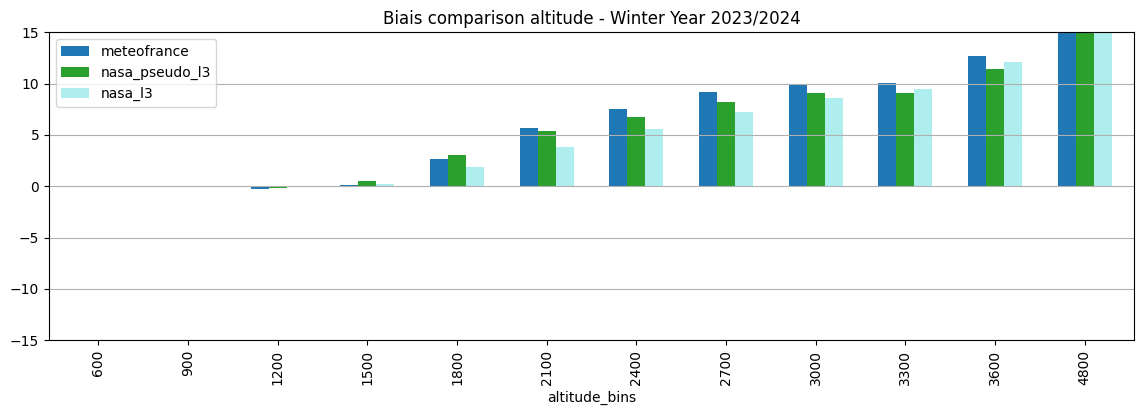

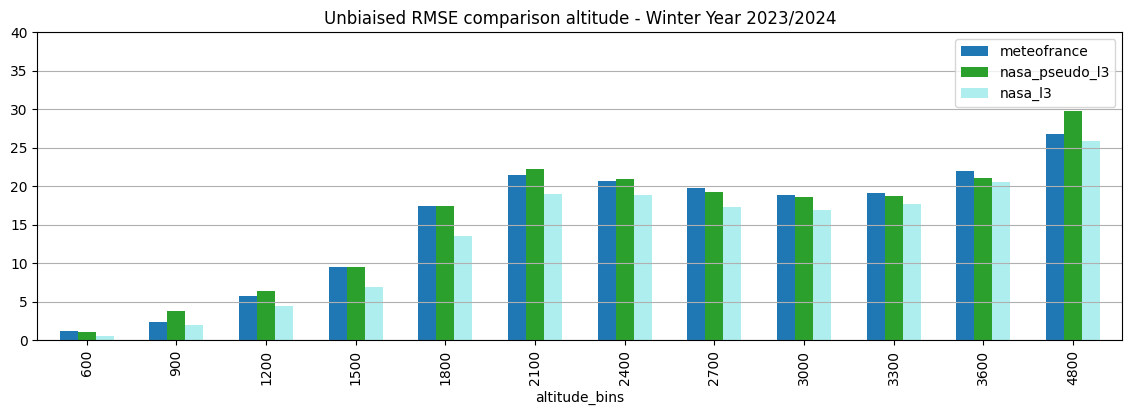

In [55]:
from evaluations.statistics_base import EvaluationVsHighResBase
from winter_year import WinterYear
from evaluations.uncertainty import  biais_barplots, postprocess_uncertainty_analysis, unbiaised_rmse_barplots

wy = WinterYear(2023,2024)
biais_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var='altitude_bins'), analysis_var_plot_name='altitude', winter_year=wy)
unbiaised_rmse_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var='altitude_bins'), analysis_var_plot_name='altitude', winter_year=wy)

In [80]:
import matplotlib.axes
import numpy as np
import matplotlib
def histograms_to_boxplot(metrics_ds : xr.Dataset, ax: matplotlib.axes.Axes):

    # def repeat_fun(metrics_ds):
    #     return np.repeat(metrics_ds['biais_bins'], repeats=metrics_ds['n_occurrences'])
    all_dims = list(metrics_ds.sizes.keys())
    all_dims.remove('biais_bins')
    metrics_squeezed = metrics_ds.sum(dim=all_dims)
    #data_to_plot = np.repeat(mf_metrics_ds.coords['biais_bins'], metrics_squeezed['n_occurrences'])
    data_to_plot = np.repeat(metrics_ds.coords['biais_bins'].values, metrics_squeezed['n_occurrences'].values.astype(np.int64))
    # ax.hist(data_to_plot)
    # plt.show()
    return xr.Dataset(ax.boxplot(data_to_plot, notch=True,widths=3, showfliers=False))


{'whiskers': [<matplotlib.lines.Line2D at 0x7d7f43329550>,
 'caps': [<matplotlib.lines.Line2D at 0x7d7f4332ac90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d7f2ee92390>],
 'medians': [<matplotlib.lines.Line2D at 0x7d7f43328b00>],
 'fliers': [],
 'means': []}

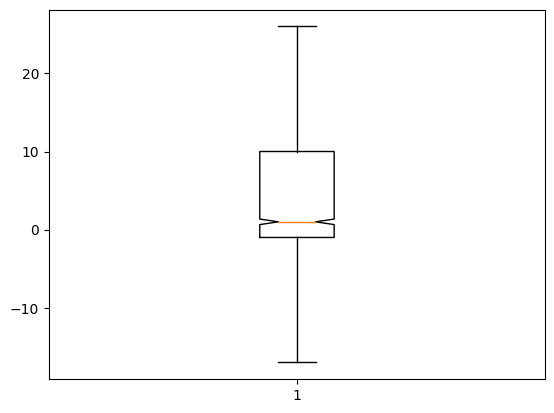

In [76]:
fig, ax = plt.subplots()
test_metrics_ds = mf_metrics_ds.isel(sensor_zenith_bins=slice(None, -1)).sel(ref_bins=slice(1, None)).isel(sensor_zenith_bins=1)
all_dims = list(test_metrics_ds.sizes.keys())
all_dims.remove('biais_bins')
metrics_squeezed = test_metrics_ds.sum(dim=all_dims)
data_to_plot = np.repeat(test_metrics_ds.coords['biais_bins'].values, metrics_squeezed['n_occurrences'].values.astype(np.int64))
ax.boxplot(data_to_plot[::100], notch=True, vert=True, sym='ko',showfliers=False)


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


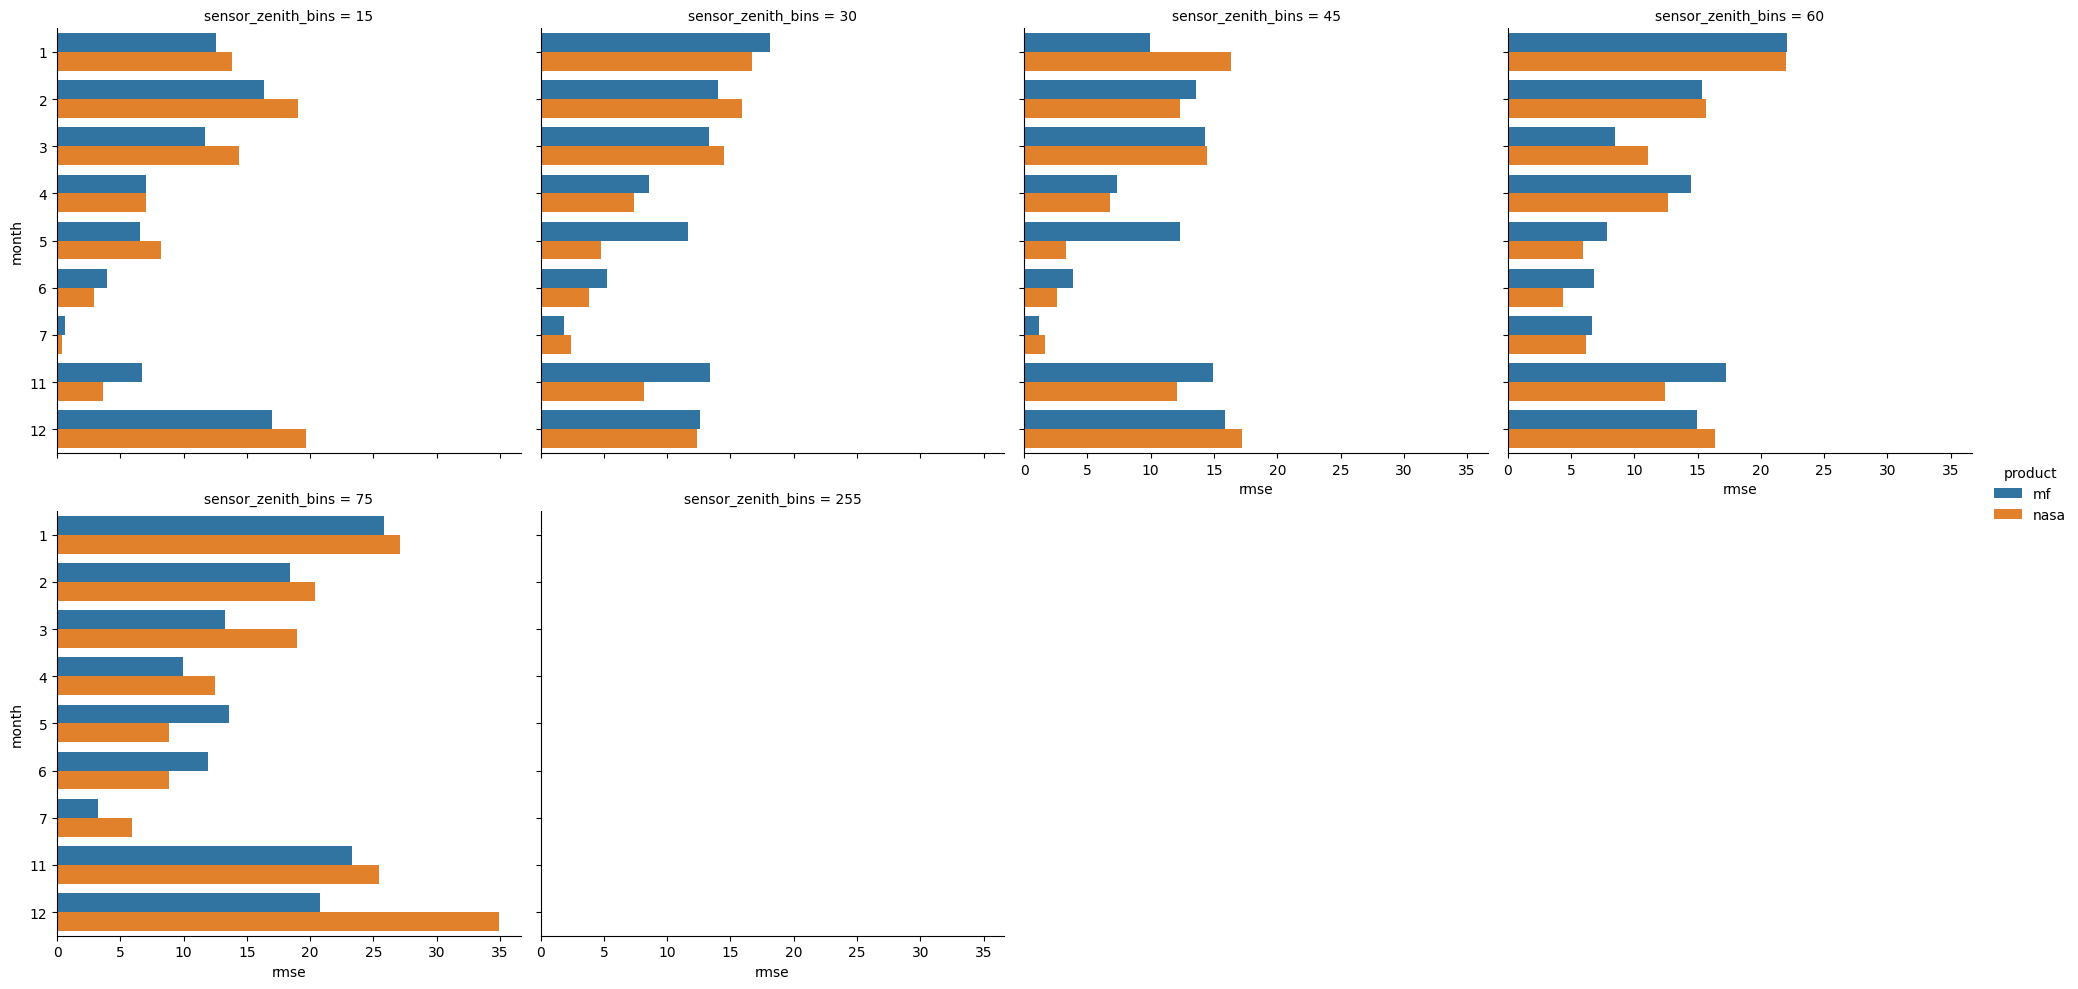

In [27]:
import pandas as pd
import seaborn as sns
from evaluations.uncertainty import postprocess_uncertainty_analysis, histograms_to_biais_rmse
reduced_mf = mf_metrics_ds.groupby(['time.month', 'sensor_zenith_bins']).map(histograms_to_biais_rmse)
# reduced_nasa = nasa_l3_metrics_ds.sel(time='2024-01').groupby(['forest_mask', 'sensor_zenith_bins']).map(histograms_to_biais_rmse)
reduced_nasa = nasa_pseudo_l3_metrics_ds.groupby(['time.month', 'sensor_zenith_bins']).map(histograms_to_biais_rmse)
reduced = xr.concat([reduced_mf, reduced_nasa], pd.Index(["mf", "nasa"], name="product"))
reduced_df = reduced.to_dataframe()
sns.catplot(reduced_df,x='rmse', y='month',hue='product',col='sensor_zenith_bins', kind='bar',col_wrap = 4,orient = 'h')

In [ ]:
def histograms_to_distribution(metrics_ds : xr.Dataset):

    # def repeat_fun(metrics_ds):
    #     return np.repeat(metrics_ds['biais_bins'], repeats=metrics_ds['n_occurrences'])
    all_dims = list(metrics_ds.sizes.keys())
    all_dims.remove('biais_bins')
    metrics_squeezed = metrics_ds.sum(dim=all_dims)
    #data_to_plot = np.repeat(mf_metrics_ds.coords['biais_bins'], metrics_squeezed['n_occurrences'])
    distribution = np.repeat(metrics_ds.coords['biais_bins'].values, metrics_squeezed['n_occurrences'].values.astype(np.int64))
    # print(len(distribution))
    return xr.DataArray(plt.boxplot(distribution))

histograms_to_distribution(mf_metrics_ds.sel(time='2023').sel(sensor_zenith_bins=15))

<xarray.DataArray 'biais' (new_dim84: 176651)> Size: 1MB
array([-100, -100, -100, ...,  100,  100,  100])
Dimensions without coordinates: new_dim84

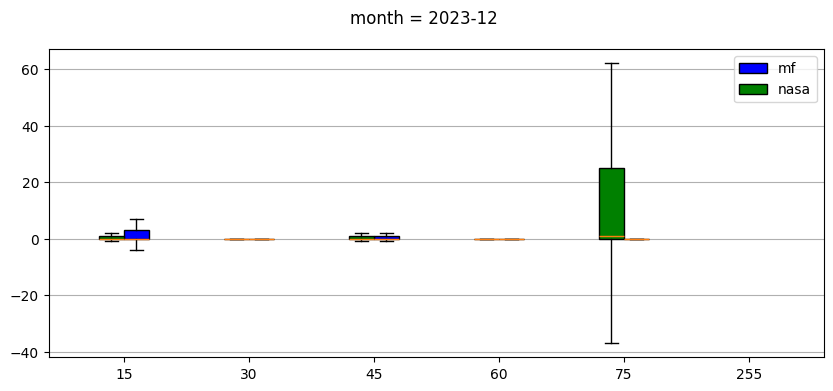

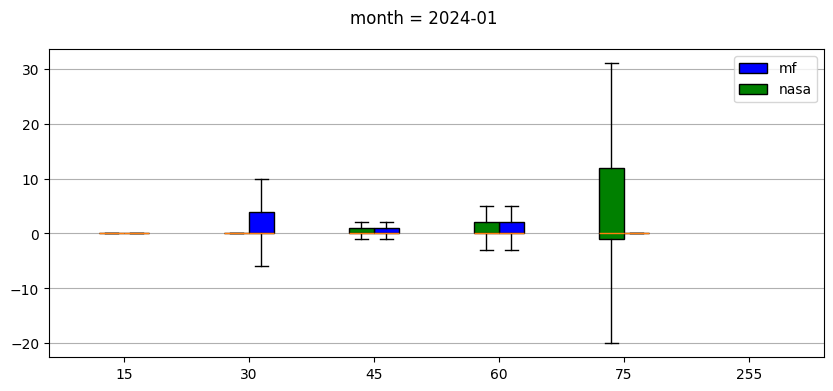

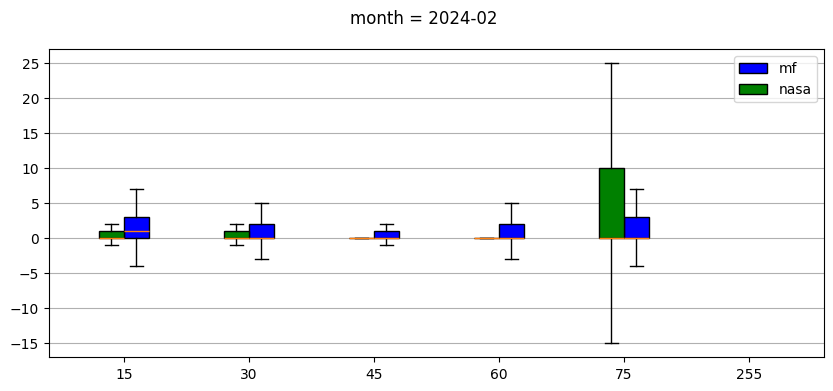

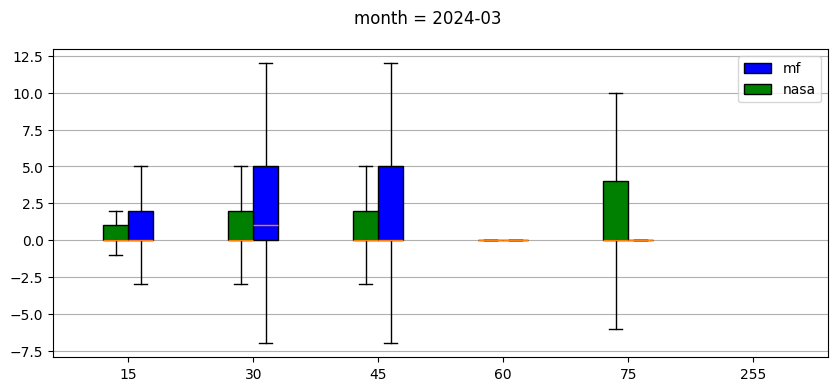

In [ ]:
import numpy as np
def histograms_to_distribution(metrics_ds : xr.Dataset):

    all_dims = list(metrics_ds.sizes.keys())
    all_dims.remove('biais_bins')
    metrics_squeezed = metrics_ds.sum(dim=all_dims)
    distribution = np.repeat(metrics_ds.coords['biais_bins'].values, metrics_squeezed['n_occurrences'].values.astype(np.int64))
    return distribution

for month in ['2023-12', '2024-01', '2024-02', '2024-03']:
    fig,ax = plt.subplots(figsize=(10,4))
    fig.suptitle(f'month = {month}')
    mf_data_distributions = []
    nasa_data_distributions = []
    for sza in mf_metrics_ds.coords['sensor_zenith_bins'].values:
        mf_data_distributions.append(histograms_to_distribution(mf_metrics_ds.sel(time=month).sel(forest_mask=0).sel(ref_bins=slice(1, None)).sel(sensor_zenith_bins=sza)))
        nasa_data_distributions.append(histograms_to_distribution(nasa_pseudo_l3_metrics_ds.sel(time=month).sel(forest_mask=0).sel(ref_bins=slice(1, None)).sel(sensor_zenith_bins=sza)))

    ticks = np.arange(len(mf_metrics_ds.coords['sensor_zenith_bins'].values))
    mf_bplot = ax.boxplot(mf_data_distributions,positions=ticks+0.1, widths=0.2,showfliers=False, patch_artist=True, label='mf')
    nasa_bplot = ax.boxplot(nasa_data_distributions,positions=ticks-0.1,widths=0.2,showfliers=False, patch_artist=True, label='nasa')
    ax.set_xticks(ticks, labels=mf_metrics_ds.coords['sensor_zenith_bins'].values)

    for patch in mf_bplot['boxes']:
        patch.set_facecolor('blue')
    for patch in nasa_bplot['boxes']:
        patch.set_facecolor('green')
    ax.grid(True, axis='y')
    ax.legend()
    ax.plot()

In [73]:
reduced_mf = histograms_to_distribution(mf_metrics_ds.sel(time='2023').sel(ref_bins=slice(1, None)).sel(sensor_zenith_bins=15))
# reduced_nasa = nasa_l3_metrics_ds.sel(time='2024-01').groupby(['forest_mask', 'sensor_zenith_bins']).map(histograms_to_biais_rmse)
reduced_nasa = histograms_to_distribution(nasa_pseudo_l3_metrics_ds.sel(time='2023').sel(sensor_zenith_bins=15))
# reduced = xr.concat([reduced_mf, reduced_nasa], pd.Index(["mf", "nasa"], name="product"))
reduced_df = pd.DataFrame(data={'mf': reduced_mf.biais.values, 'nasa': reduced_nasa.biais.values}, index=[15])
sns.catplot(reduced_df,x='biais', y='month',hue='product',col='sensor_zenith_bins', kind='box',col_wrap = 4,orient = 'h')

AttributeError: 'DataArray' object has no attribute 'biais'